<a href="https://colab.research.google.com/github/Alexanderputz11/Projects/blob/main/Dementia_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Dementia Predictors Analysis

Dementia is a neurodegenerative disorder that is described as a progressive loss of intellectual function due to an organic disease of the brain.

Currently, An estimated 6.7 million Americans age 65 and older are living with Alzheimer's in 2023. Seventy-three percent are age 75 or older.

About 1 in 9 people age 65 and older (10.7%) has Alzheimer's.

**Goal: ** Identify factors that can assist with early identification of dementia.

# **Importing the Data**

Before you are able to analyze any data in Python, you must first import various tools that enable the user to perform various analyses and create visualizations.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error

# Importing Drive from google.colab

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Upload the DataFrame

In [4]:
dementia = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/dementia_dataset.csv')

# Data Exploration
.info() is used to provide a list of columns with the corresponding number of values and data types:

In [5]:
dementia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


.shape is used to show us the dimensions of the dataset. We see it contains 373 rows and 15 columns.

In [6]:
dementia.shape

(373, 15)

# Analyze the DataFrame
Here dementia.describe() is used to look at the descriptive statistics within each column in our dataset. Which helps us to determine averages, ranges, and potential outliers for each category.

In [34]:
dementia.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


#Identifying Nulls

In [33]:
dementia.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

# Filling Nulls
The nulls in SES need to be dealt with. Here .fillna is used to replace nulls with 0.

In [32]:
dementia['SES'].fillna(0)

0      2.0
1      2.0
2      0.0
3      0.0
4      0.0
      ... 
368    1.0
369    1.0
370    2.0
371    2.0
372    2.0
Name: SES, Length: 373, dtype: float64

Now the same thing has to be done with MMSE

In [36]:
dementia['MMSE'].fillna(0)

0      27.0
1      30.0
2      23.0
3      28.0
4      22.0
       ... 
368    28.0
369    26.0
370    30.0
371    30.0
372    30.0
Name: MMSE, Length: 373, dtype: float64

Here the variable M/F is being renamed to biological "Sex" for clarity.

In [38]:
dementia = dementia.rename(columns = {'M/F' : 'Sex'})

# Correlations

Below there is a heatmap to look at the relationship between various variables in the dataset. CDR is a Clinical Dementia Rating, which tells someone the severity level of dementia. Looking at the different variables we see MMSE has a moderate negative correlation with CDR. Education,SES, and nWBV all have a mild negative correlations.

<ipython-input-39-945f0ac79e68>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dementia.corr(), annot = True, cmap = 'OrRd')


<Axes: >

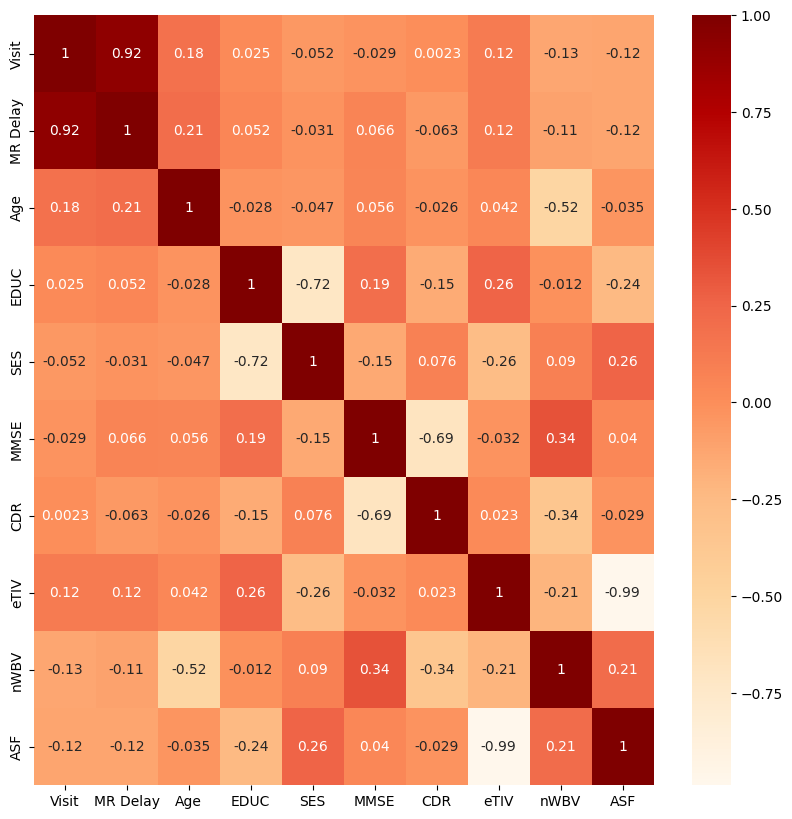

In [39]:
plt.figure(figsize = (10,10))
sns.heatmap(dementia.corr(), annot = True, cmap = 'OrRd')

# Shaping the Data


Next a variable will be created to include all participants with a CDR indicating some level of dementia.


In [125]:
df1=dementia[(dementia['CDR'] == .5)|(dementia['CDR'] == 1)|(dementia['CDR'] == 2)]
df1

,Subject ID,MRI ID,Group,Visit,MR Delay,Gender,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,OAS2_0184,OAS2_0184_MR1,Demented,1,0,F,R,72,16,3.0,24.0,0.5,1354,0.733,1.296
366,OAS2_0184,OAS2_0184_MR2,Demented,2,553,F,R,73,16,3.0,21.0,1.0,1351,0.708,1.299
367,OAS2_0185,OAS2_0185_MR1,Demented,1,0,M,R,80,16,1.0,28.0,0.5,1704,0.711,1.030
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037


Now we will determine values where the person was not diagnosed with dementia.

In [57]:
df2=dementia[dementia['CDR'] == 0]
df2

,Subject ID,MRI ID,Group,Visit,MR Delay,Gender,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,OAS2_0183,OAS2_0183_MR3,Nondemented,3,732,F,R,68,13,2.0,30.0,0.0,1506,0.740,1.165
364,OAS2_0183,OAS2_0183_MR4,Nondemented,4,2107,F,R,72,13,2.0,30.0,0.0,1510,0.723,1.162
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


# Running t-tests
Import scipy

In [128]:
from scipy import stats as stats

Hypothesis_1:
Does MMSE score predict the likelihood of Dementia?

*   H0: No based on MMSE
*   Ha: Difference based on high vs low MMSE




In [127]:
stats.ttest_ind(df1['MMSE'], df2['MMSE'], nan_policy='omit')

Ttest_indResult(statistic=-13.374325541581296, pvalue=1.5445513864984107e-33)

Since we have a p-value significantly less than .05, we can determine there is a statistically significant relationship between MMSE and Dementia.

Determine Confidence Intervals

In [129]:
sample_1_n = df1.shape[0]
sample_2_n = df2.shape[0]
sample_1_mean = df1['MMSE'].mean()
sample_2_mean = df2['MMSE'].mean()
sample_1_var = df1['MMSE'].var()
sample_2_var = df2['MMSE'].var()


In [130]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(df1['MMSE'],df2['MMSE'])

'The difference in means at the 95% confidence interval (two-tail) is between 3.5469867585391524 and 4.911736395329637.'

we have met the confidence interval which shows that the results for MSSE would likely be a good predictor of dementia if we repeated this study.

# MMSE Visualization
-As the severity of dementia increases, the average score on the MMSE decreases.

<Axes: xlabel='CDR', ylabel='MMSE'>

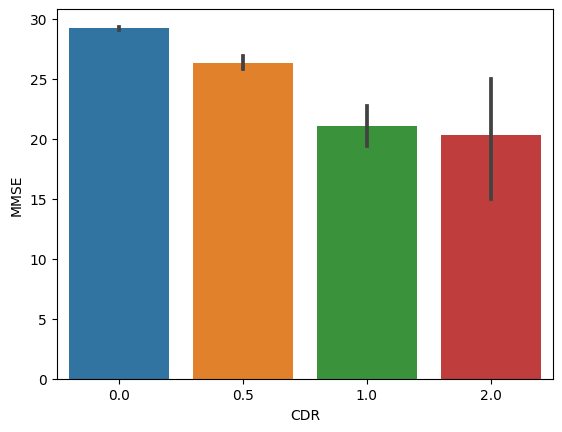

In [9]:
sns.barplot(x="CDR", y="MMSE", data=dementia)

# Hypothesis_2:
Does age influence the probability of dementia?

*   H0: No difference across age.
*   Ha: Difference across age.

In [132]:
stats.ttest_ind(df1['Age'], df2['Age'], nan_policy='omit')

Ttest_indResult(statistic=-0.3979968519735993, pvalue=0.6908614250349431)

The results of this study show that there is a negative correlation between age and dementia, but it however, since the pvalue is higher than .05 this correlation is not statistically significant.

# Confidence Interval



In [133]:
sample_1_n = df1.shape[0]
sample_2_n = df2.shape[0]
sample_1_mean = df1['Age'].mean()
sample_2_mean = df2['Age'].mean()
sample_1_var = df1['Age'].var()
sample_2_var = df2['Age'].var()

In [134]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(df1['Age'],df2['Age'])

'The difference in means at the 95% confidence interval (two-tail) is between -1.2223929468103973 and 1.85642585187406.'

we have met the confidence interval which shows that the results for Age would likely be not be a good predictor for dementia if we repeated the study with a similar sample.

# Age Visualization

<Axes: xlabel='CDR', ylabel='Age'>

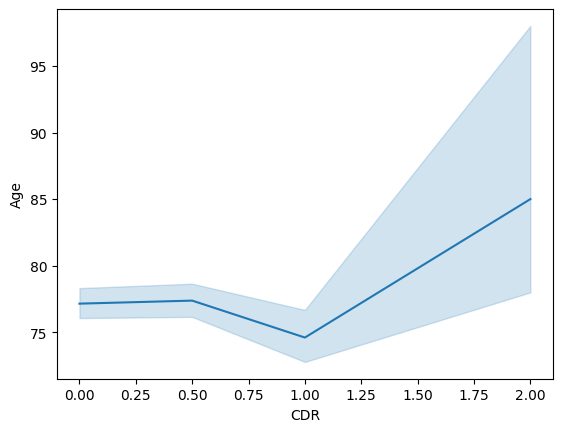

In [19]:
sns.lineplot(x="CDR", y="Age", data=dementia)

# Hypothesis_3:
3	Does SES relate to likelihood of dementia?

*   H0: There is no difference across SES
*   Ha: There is a difference across SES.






# Running the t-test

In [135]:
stats.ttest_ind(df1['SES'], df2['SES'], nan_policy='omit')

Ttest_indResult(statistic=2.4743631917211237, pvalue=0.013818109820460904)

Since we have a pvalue less than .05, we can determine there is a significant correlation between SES and Dementia.

# Confidence Intervals

In [136]:
sample_1_n = df1.shape[0]
sample_2_n = df2.shape[0]
sample_1_mean = df1['SES'].mean()
sample_2_mean = df2['SES'].mean()
sample_1_var = df1['SES'].var()
sample_2_var = df2['SES'].var()

In [137]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(df1['SES'],df2['SES'])

'The difference in means at the 95% confidence interval (two-tail) is between -0.5347522072160116 and -0.06561515043289923.'

The confidence interval is met, therefor SES would likely be a good predictor of dementia.

Below we have created a boxplot to visualize the data. Looking at the distribution of data we see a significant drop in SES at the moderately severe CDR.

# Visualization

<Axes: xlabel='CDR', ylabel='SES'>

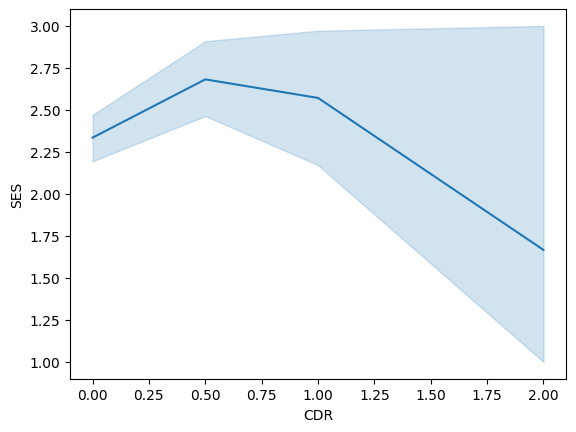

In [16]:
sns.lineplot(x="CDR", y="SES", data=dementia)

# Hypothesis_4:
Prove (or disprove) a difference in likelihood of dementia diagnosis by ASF.

*   H0:  There is no difference between higher and lower  ASF.
*   Ha: There is a difference between higher and lower  ASF.






Here we will run a t-test based on the amplitude of the person's brainwaves in response to stimuli, in regards to a dementia diagnosis.

In [138]:
stats.ttest_ind(df1['ASF'], df2['ASF'], nan_policy='omit')

Ttest_indResult(statistic=-0.25530411526399777, pvalue=0.7986296965719835)

Here we see that ASF was not significantly correlated with a dementia diagnosis.

# Confidence Interval

In [139]:
sample_1_n = df1.shape[0]
sample_2_n = df2.shape[0]
sample_1_mean = df1['ASF'].mean()
sample_2_mean = df2['ASF'].mean()
sample_1_var = df1['ASF'].var()
sample_2_var = df2['ASF'].var()

In [140]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(df1['ASF'],df2['ASF'])

'The difference in means at the 95% confidence interval (two-tail) is between -0.024431378503532015 and 0.03178269528743989.'

we have met the confidence interval which shows that the results for ASF would likely not be a good predictor of dementia if we repeated this study with a similar sample.

# Visualization

Now we will create a visualization using a barplot. As we can see in the graph, ASF is consistent across CDR, which would mean it is not a good predictor of dementia. A line graph was used to demonstrate the relationship in a more clear manner.

<Axes: xlabel='CDR', ylabel='ASF'>

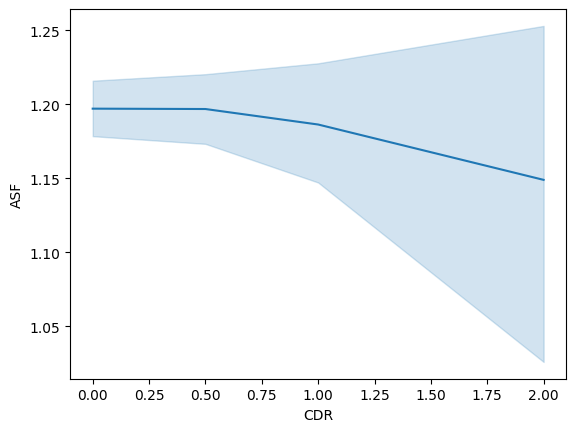

In [15]:
sns.lineplot(x="CDR", y="ASF", data=dementia)

Hypothesis_5:
Does level of education effect the likelihood of developing dementia?


*  H0: No difference across education levels
*  Ha: Difference across education levels




Next, we will run a t-test to determine whether education level significantly correlates with a dementia diagnosis.

In [141]:
stats.ttest_ind(df1['EDUC'], df2['EDUC'], nan_policy='omit')

Ttest_indResult(statistic=-4.290614995214906, pvalue=2.2760808336946914e-05)

Since our p-value is above .05, we can determine that education level did significantly effect the liklihood of a dementia diagnosis.

# Confidence Intervals

In [142]:
sample_1_n = df1.shape[0]
sample_2_n = df2.shape[0]
sample_1_mean = df1['EDUC'].mean()
sample_2_mean = df2['EDUC'].mean()
sample_1_var = df1['EDUC'].var()
sample_2_var = df2['EDUC'].var()

Again, we have met the confidence interval of 95% which informs us that the results are reliable.  

In [143]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(df1['EDUC'],df2['EDUC'])

'The difference in means at the 95% confidence interval (two-tail) is between 0.6772694064785749 and 1.834735709503055.'

# Visualization

In this graph we see that people with less education were more likely to be diagnosed with mild dementia. However, moderate dementia was identified accross all education levels. A line plot was chosen because it demonstrated the data trend in a more clear manner than a bar or box plot.

<Axes: xlabel='CDR', ylabel='EDUC'>

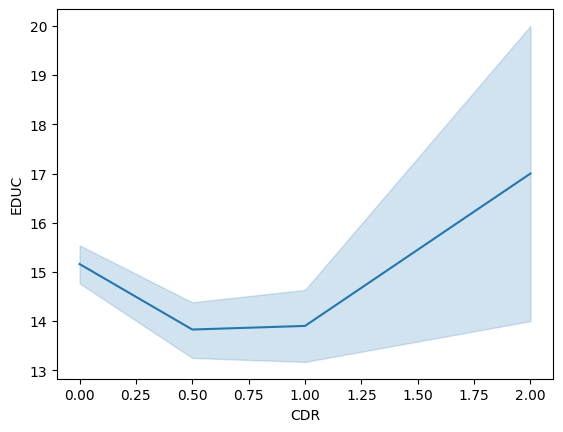

In [14]:
sns.lineplot(x="CDR", y="EDUC", data=dementia)

# Hypothesis_6:
Does lower nWBV increase the risk of dementia:


*   H0: There is no difference in CDR based on  nWBV.
*   Ha:  There is a difference in CDR  between nWBV



Now we will run the t-test

In [155]:
stats.ttest_ind(df1['nWBV'], df2['nWBV'], nan_policy='omit')

Ttest_indResult(statistic=-6.640510443313793, pvalue=1.1136916838404847e-10)

This reveals a statistically significant negative correlation between nWBV and CDR. Next we will determine if it meets our confidence interval.

# Confidence Intervals

In [156]:
sample_1_n = df1.shape[0]
sample_2_n = df2.shape[0]
sample_1_mean = df1['nWBV'].mean()
sample_2_mean = df2['nWBV'].mean()
sample_1_var = df1['nWBV'].var()
sample_2_var = df2['nWBV'].var()

In [157]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(df1['EDUC'],df2['EDUC'])

'The difference in means at the 95% confidence interval (two-tail) is between 0.6772694064785749 and 1.834735709503055.'

We have met the confidence interval, which means if we repeated the study the results are likely reproducible.

# Visualization

Looking at this scatterplot, we can easily see where participants' scores fall. We can observe that nWBV decreases as the Clinical Dementia Rating becomes more severe.

<Axes: xlabel='CDR', ylabel='nWBV'>

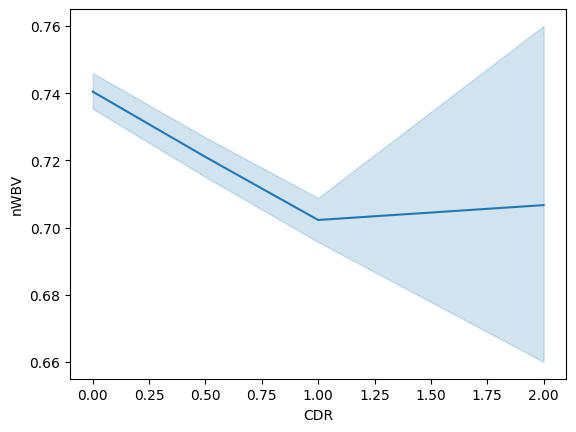

In [17]:
sns.lineplot(x="CDR", y="nWBV", data=dementia)

Based on the results of this dataset, there is a high likelihood that people who score below a 25 on the data set, are in a lower SES, and have an nWBV between .750 and .650 are more likely to be diagnosed with dementia.

# Implications

At risk groups include people who:

*   Scored Below 25 on the MSSE
*   Are from lower SES
*   Have lower levels of education
*   Have smaller nWBV

